# CW Laser Tuning Technique

In [ ]:
import Ring_core as rc
import numpy as np

%load_ext autoreload
%autoreload 2

## Microresonator parameters

In [31]:
ring_params = {  
                'N': 511, # Number of modes. It must be odd!
                'n0': 2.4, # Refractive index
                'n2': 2.4e-19, # Nonlinear reftactive index [m^2/W]
                'FSR': 100e9, # Free Spectral Range [Hz]
                'lambda0': 1553.4e-9, # CW pump wavelength [m]
                'kappa': 3e8, # Optical linewidth [Hz]
                'eta': 0.5, # Coupling efficiency
                'Veff': 1e-15, # Effective mode volume [m^3]
                'D2': 2.5e6, # Second order dispersion [Hz]
                'n2T': 2.4e-18, # Coefficient of thermal nonlinerity [m^2/W]
                'Pin': 2 # Pump power [W]
            }

In [113]:
ring_1 = rc.Ring(ring_params)

## Simulation options

In [33]:
sim_opts = { 
            'Tuning': 'Forward', # "Forward" or "Forward and backward"
            'Effects': None, # None or "Thermal" or "Avoided mode crossings"
            'Noise': False # True or False
        }

## Simulation parameters

In [130]:
fwrd_params = {
                'dseta_start': -10, # Normalized detuning start
                'dseta_end': 20, # Normalized detuning end
                'Amu0': np.random.randn(ring_params['N']) + (np.random.randn(ring_params['N']) * 1j), # Initial field
                'dseta_step': 0.01, # Tuning step
                'roundtrips_step': 10 # Roundtrips per tuning step
            }

## Numerical simulation

In [131]:
amu_fwrd = ring_1.num_sim(fwrd_params, sim_opts)

Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Progress: 47%
Progress: 48%
Progress: 49%
Progress: 50%
Progress: 51%
Progress: 52%
Progress: 53%
Progress: 54%
Progress: 55%
Progress: 56%
Progress: 57%
Progress: 58%
Progress: 59%
Progress: 60%
Progress: 61%
Progress: 62%
Progress: 63%
Progress: 64%
Progress: 65%
Progress: 66%
Progress: 67%
Progress: 68%
Progress: 69%
Progress: 70%
Progress: 71%
Pr

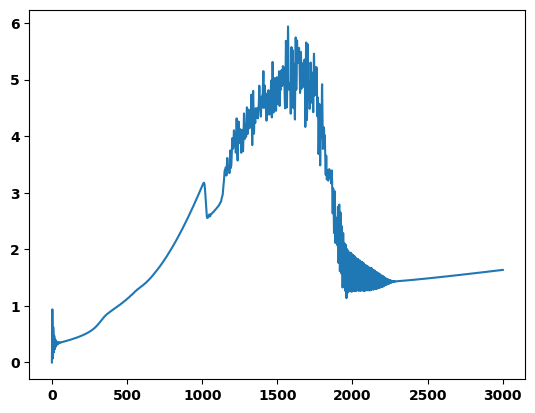

In [132]:
import matplotlib.pyplot as plt

avg = np.sum(np.abs(amu_fwrd)**2, 1)
plt.plot(avg)